<a href="https://colab.research.google.com/github/aditisingh2912/Intro-to-CV/blob/main/OpenCV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

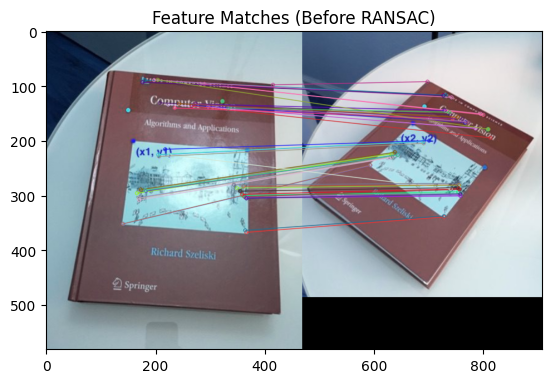

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/image1.png')
img2 = cv2.imread('/content/image2.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(500)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.title("Feature Matches (Before RANSAC)")
plt.show()




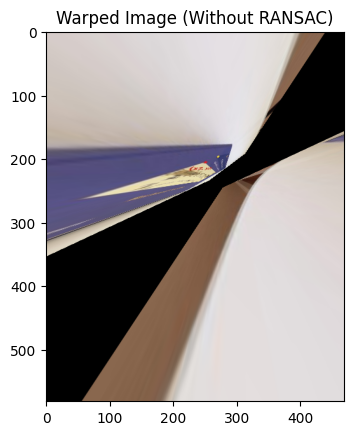

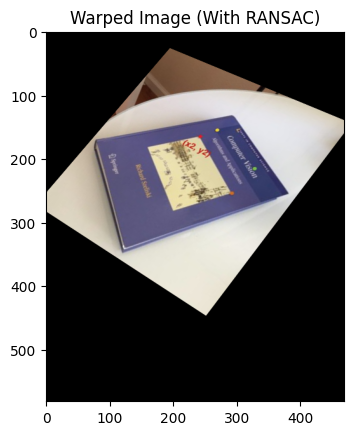

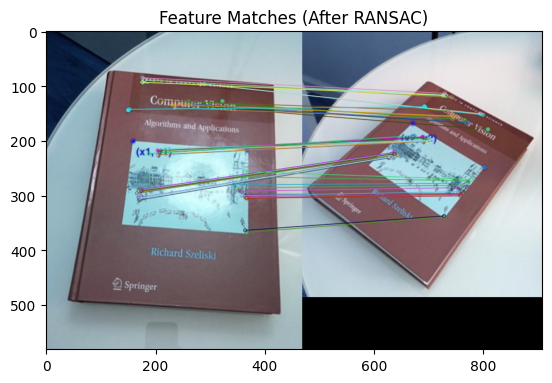

In [ ]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, status = cv2.findHomography(src_pts, dst_pts, method=0)  # No RANSAC

height, width, _ = img1.shape
img_warp = cv2.warpPerspective(img2, H, (width, height))

plt.imshow(cv2.cvtColor(img_warp, cv2.COLOR_BGR2RGB))
plt.title("Warped Image (Without RANSAC)")
plt.show()

H_ransac, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 6.0)  # RANSAC with threshold 5.0

img_warp_ransac = cv2.warpPerspective(img2, H_ransac, (width, height))

plt.imshow(cv2.cvtColor(img_warp_ransac, cv2.COLOR_BGR2RGB))
plt.title("Warped Image (With RANSAC)")
plt.show()

inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]

img_inliers = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_inliers)
plt.title("Feature Matches (After RANSAC)")
plt.show()

In [ ]:
def feature_matching(image1_path, image2_path,use_ransac=False):
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    all_matches = [m[0] for m in matches if len(m) > 0]

    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in all_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in all_matches]).reshape(-1, 1, 2)

    H, _ = cv2.findHomography(src_pts, dst_pts, method=0)

    print("Homography Matrix:")
    print(H)

image1_path = "/content/image1.png"
image2_path = "/content/image2.png"
homography_matrix = feature_matching(image1_path, image2_path)
homography_matrix_ransac = feature_matching(image1_path, image2_path,use_ransac=True)

Homography Matrix:
[[ 5.56695364e+00 -5.90096761e+00  2.44237428e+02]
 [ 5.41532969e+00 -5.68988372e+00  2.25349379e+02]
 [ 2.30164612e-02 -2.43583127e-02  1.00000000e+00]]
Homography Matrix:
[[ 5.56695364e+00 -5.90096761e+00  2.44237428e+02]
 [ 5.41532969e+00 -5.68988372e+00  2.25349379e+02]
 [ 2.30164612e-02 -2.43583127e-02  1.00000000e+00]]
